## Import

In [2]:
import numpy as np
import pandas as pd

import os
import sys

import matplotlib.pyplot as plt
# %matplotlib inline

import pickle
import cv2

import importlib
# from classifiers import R_from_path

In [3]:
current_dir = os.getcwd()
code_path = os.path.abspath(os.path.join(current_dir, '..', '..', 'codes'))
data_path = os.path.abspath(os.path.join(current_dir, '..', '..', 'data'))

sys.path.append(os.path.join(code_path, 'project_x_ray_images_stack'))
# sys.path.append(r'E:\photoelectric_sorting\codes\project_x_ray_images_stack')

In [4]:
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [5]:
from scipy.optimize import curve_fit
from sklearn.metrics import accuracy_score

In [6]:
from matplotlib import rc

rc('text', usetex=False)
font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal',
        'size': 10}
rc('font', **font)

In [7]:
import seaborn as sns

# sns.set_context("notebook")
# sns.set_context('talk')
# sns.set_style("ticks")
# sns.set_style("whitegrid")

sns.reset_defaults()


In [8]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [147]:
import dataloader
importlib.reload(dataloader)
from dataloader import path2truth, path2pixel, load_data

In [148]:
path_0219 = os.path.join(data_path, '20250219/160kV_4mA_forward.png')
excel_0219 = os.path.join(data_path, '化验结果/20250219化验结果.xlsx')

excel_0224 = os.path.join(data_path, '化验结果/20250224化验结果.xlsx')
path_0224 = os.path.join(data_path, '20250224/160kV_4mA_forward.png')

#low_0219, high_0219, rock_pixels_19, low_contoured_19, contours 
# pre_0219_2 = path2pixel(path_0219, [105, 1000, 400, 1200], max_len = 6, length=102, th_val = 105,
#                                   direction = 'ublr', s_i = 64, save_rock_image=False)

# pre_0219_1 = path2pixel(path_0219, [1950, 2844, 350, 1150], max_len = 9, length=35, th_val = 105,
#                                   direction = 'ublr', s_i = 1, save_rock_image=False)

# pre_0219 =[append_generic(pre_0219_1[i], pre_0219_2[i]) for i in range(len(pre_0219_1))]

# pixel_data = {
#     '0219': {
#         'low': pre_0219[2][0],
#         'high': pre_0219[2][1]
#     },
# }
# with open('0219_pixels.pkl', 'wb') as f:
#     pickle.dump(pixel_data, f)

#low_0219, high_0219, rock_pixels_19, low_contoured_19, contours 
z = path2pixel(path_0219, [[105, 1000, 400, 1200], [1950, 2844, 350, 1150]], max_len = [6, 9], length = [102, 35], 
           s_i = [64, 1], th_val = 105, save_rock_image = False, direction = 'ublr', save_rock_pixels=False)

consts = [5, 20]; th_val = 110

y = path2pixel(path_0224, [[105, 1000, 400, 1200], [1850,-100, 350,1150]], max_len = [6, 9], length=[102, 35], 
               s_i = [64, 1], th_val = 110, save_rock_image = False, direction = 'ublr', save_rock_pixels=False)


2025-03-27 16:47:01,858 - INFO - 2个盒子的图像转换rock_pixels完成。
2025-03-27 16:47:02,085 - INFO - 2个盒子的图像转换rock_pixels完成。


In [149]:
input_0224 = load_data(y[2], excel_0224)
input_0219 = load_data(z[2], excel_0219)

2025-03-27 16:47:02,312 - INFO - 加载数据完成。清洗后的样本数量: 102


2025-03-27 16:47:02,346 - INFO - 加载数据完成。清洗后的样本数量: 98


In [150]:
input_0224[1]

,Sample No.,Fe_grade,Zn_grade,Pb_grade,S_grade,weight
0,1,13.970,13.350,23.720,0.0,19.3
1,2,24.430,3.917,0.319,0.0,25.6
3,4,21.380,0.034,0.036,0.0,46.6
4,5,16.500,0.175,0.533,0.0,48.3
5,6,8.495,14.770,33.310,0.0,65.7
...,...,...,...,...,...,...
100,101,7.973,1.509,1.325,0.0,38.8
101,102,10.970,0.062,0.046,0.0,27.9
102,103,25.000,0.086,0.118,0.0,32.7
103,104,6.502,0.177,0.076,0.0,68.7


In [165]:
import pandas as pd

# 创建第一个 DataFrame
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index=[1, 2])
# 创建第二个 DataFrame
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]}, index=[1, 2])

# 纵向合并两个 DataFrame
result = pd.concat([df1, df2], axis=0)


In [220]:
input_both = [[],]
input_both[0].append(input_0224[0][0].copy(deep = True))
input_both[0][0].index += 99

input_both[0].append(input_0224[0][1].copy(deep = True))
input_both[0][1].index += 99

input_both.append(input_0224[1].copy(deep = True))
input_both[1].index += 99

input_both[0][0] = pd.concat([input_0219[0][0], input_both[0][0]], axis = 0)
input_both[0][1] = pd.concat([input_0219[0][1], input_both[0][1]], axis = 0)
input_both[1]= pd.concat([input_0219[1], input_both[1]], axis = 0)

In [221]:
input_both

[[0      [153, 133, 132, 130, 148, 168, 181, 156, 110, ...
  1      [167, 151, 135, 158, 150, 148, 137, 152, 142, ...
  2      [152, 134, 110, 109, 106, 114, 122, 133, 130, ...
  3      [154, 149, 149, 157, 158, 166, 160, 158, 166, ...
  4      [147, 112, 105, 116, 115, 94, 75, 84, 110, 127...
                               ...                        
  199    [159, 125, 117, 134, 153, 149, 97, 67, 63, 74,...
  200    [127, 126, 143, 118, 110, 87, 107, 123, 123, 1...
  201    [151, 150, 121, 132, 151, 147, 162, 180, 155, ...
  202    [162, 164, 154, 148, 135, 121, 118, 135, 139, ...
  203    [153, 160, 160, 173, 163, 134, 120, 119, 114, ...
  Length: 200, dtype: object,
  0      [164, 169, 178, 191, 188, 189, 191, 144, 130, ...
  1      [150, 169, 165, 162, 156, 162, 166, 168, 135, ...
  2      [152, 145, 143, 143, 147, 151, 155, 158, 160, ...
  3      [164, 162, 161, 160, 163, 162, 169, 163, 173, ...
  4      [186, 160, 175, 190, 127, 140, 165, 173, 177, ...
                          

## definitions

In [17]:
def calculate_rates(predictions, true_results, count_Fe = False):
    '''
    计算抛废率、回收率、铅锌富集比、铅锌平均品位
    :param predictions: 预测结果，一维数组
    :param true_results: 真实结果，excel表格
    
    :return: 抛废率、回收率、铅锌富集比、铅锌平均品位
    '''
    high_grade_mask = predictions == 1
    low_grade_mask = predictions == 0

    Fe_grade = true_results[:, 1]
    zn_grade = true_results[:, 2]
    pb_grade = true_results[:, 3]
    zn_pb_grade = zn_grade + pb_grade

    if count_Fe:
        zn_pb_grade = zn_grade + pb_grade + Fe_grade

    weight = true_results[:, 5]

    miss = (zn_grade == 0).sum()
    correction = len(predictions)/(len(predictions) - miss)

    # 计算抛废率和回收率
    scrap_rate = weight[low_grade_mask].sum() / weight.sum()
    recovery_rate = (weight[high_grade_mask] * zn_pb_grade[high_grade_mask]).sum() / (weight * zn_pb_grade).sum()

    # 计算富集率
    avg_pb_grade_all = pb_grade.mean()*correction
    avg_zn_grade_all = zn_grade.mean()*correction

    avg_pb_grade_high = (pb_grade[high_grade_mask] * weight[high_grade_mask]).sum()/weight[high_grade_mask].sum()
    avg_zn_grade_high = (zn_grade[high_grade_mask] * weight[high_grade_mask]).sum()/weight[high_grade_mask].sum()
    avg_pb_grade_low = (pb_grade[low_grade_mask] * weight[low_grade_mask]).sum()/weight[low_grade_mask].sum()
    avg_zn_grade_low = (zn_grade[low_grade_mask] * weight[low_grade_mask]).sum()/weight[low_grade_mask].sum()

    # avg_pb_grade_high = pb_grade[high_grade_mask].mean()*correction
    # avg_zn_grade_high = zn_grade[high_grade_mask].mean()*correction
    # avg_pb_grade_low =  pb_grade[low_grade_mask].mean()*correction
    # avg_zn_grade_low = zn_grade[low_grade_mask].mean()*correction

    enrichment_Pb = avg_pb_grade_high / avg_pb_grade_all if avg_pb_grade_all != 0 else 0
    enrichment_Zn = avg_zn_grade_high / avg_zn_grade_all if avg_zn_grade_all != 0 else 0

    return {
        '抛废率': '%.3f'%scrap_rate,
        '回收率': '%.3f'%recovery_rate,
        '铅富集比': '%.3f'%enrichment_Pb,
        '锌富集比': '%.3f'%enrichment_Zn,
        '铅平均品位（保留）': '%.3f'%avg_pb_grade_high,
        '锌平均品位（保留）': '%.3f'%avg_zn_grade_high,
        '铅平均品位（抛废）': '%.3f'%avg_pb_grade_low,
        '锌平均品位（抛废）': '%.3f'%avg_zn_grade_low,
        '铅平均品位': '%.3f'%avg_pb_grade_all,
        '锌平均品位': '%.3f'%avg_zn_grade_all,
    }

def get_and_plot_rates(R_mean, rrange, true, condition, count_Fe = False, accuracy_weight = None, title = '', plot = False):
    '''
    计算并画出抛废率和回收率随R阈值变化的曲线
    :param R_mean: R值的均值
    :param range: R阈值的范围
    :param true: 真实的化验数据
    :param condition: 认为是精矿的条件
    '''

    final = [[], [], [], []]

    for r in rrange:
        pre = R_mean >  r
        res = calculate_rates(pre, true, count_Fe=count_Fe)
        score = accuracy_score(condition, pre, sample_weight=accuracy_weight)
        # print('%.3f'%r, '%.3f'%score, res)

        final[0].append(r)
        final[1].append(score)
        final[2].append(float(res['抛废率']))
        final[3].append(float(res['回收率']))

    if plot:

        # plt.axhline(y=95, color='k', linestyle='--', alpha = 0.5, label = '95%')

        # plt.axvline(x=0.72, color='k', linestyle='--', alpha = 0.5, label = '$R_{thresh} = 0.72$')
        # plt.axvline(x=0.70, color='k', linestyle='--', alpha = 0.5, label = '$R_{thresh} = 0.70$')

        # plt.text(x = 0.73, y = 92, s = 'R = 0.72, scrap%=35%, \n recovery%=94%', fontsize = 15)
        plt.plot(final[0], final[1], label = 'classification score')
        plt.plot(final[0], final[2], label = 'scrap rate')
        plt.plot(final[0], final[3], label = 'recovery rate')
        
        plt.legend(fontsize = 15, frameon = False)
        plt.xlabel('R threshold')
        plt.ylabel('Rates (%)')
        plt.title(title)
        plt.show()

    return final

## analysis

In [27]:
I0_low, I0_high = 195, 196
# path_0219 = "E:/photoelectric_sorting/data/20250219/160kV_4mA_forward.png"
# path_0217 = "E:/photoelectric_sorting/data/20250217_three_columns_good_three_columns_bad/160kV_4mA.png" #[110, 1000, 400, 1200]

# path_0219 = os.path.join(data_path, '20250219/160kV_4mA_forward.png')

# #low_0219, high_0219, rock_pixels_19, low_contoured_19, contours 
# pre_0219_2 = prepare_R(path_0219, [105, 1000, 400, 1200], max_len = 6, length=102, th_val = 105,
#                                   direction = 'ublr', s_i = 64, save_rock_image=False)

# pre_0219_1 = prepare_R(path_0219, [1950, -100, 350, 1150], max_len = 9, length=35, th_val = 105,
#                                   direction = 'ublr', s_i = 1, save_rock_image=False)

# pre_0219 =[append_generic(pre_0219_1[i], pre_0219_2[i]) for i in range(len(pre_0219_1))]

# #R_0219_pixels, R_0219_image
consts = [5, 20]
results_0219 = R_from_path(*pre_0219[0:3], I0_low, I0_high, input = 'pixels', method = 'a', const=consts)   
R_0219_mean = np.array([results_0219[0][i].mean() for i in range(len(results_0219[0]))])

In [37]:
import numpy as np
from scipy.stats import pearsonr

# 假设 zn_pb_0219, R_0219_mean, zn_pb_fe_0219 已经定义
# 计算 zn_pb_0219 和 R_0219_mean 的皮尔逊相关系数和 p 值
corr_1, p_value_1 = pearsonr(zn_pb_0219, R_0219_mean)
# 修改输出格式，相关系数保留两位小数，p值以科学计数法保留两位有效数字
print(f"zn_pb_0219 和 R_0219_mean 的皮尔逊相关系数: {corr_1:.2f}, p 值: {p_value_1:.2e}")

# 计算 zn_pb_fe_0219 和 R_0219_mean 的皮尔逊相关系数和 p 值
corr_2, p_value_2 = pearsonr(zn_pb_fe_0219, R_0219_mean)
# 修改输出格式，相关系数保留两位小数，p值以科学计数法保留两位有效数字
print(f"zn_pb_fe_0219 和 R_0219_mean 的皮尔逊相关系数: {corr_2:.2f}, p 值: {p_value_2:.2e}")

from scipy.stats import spearmanr

# 计算 zn_pb_0219 和 R_0219_mean 的斯皮尔曼等级相关系数和 p 值
corr_3, p_value_3 = spearmanr(zn_pb_0219, R_0219_mean)
# 修改输出格式，相关系数保留两位小数，p值以科学计数法保留两位有效数字
print(f"zn_pb_0219 和 R_0219_mean 的斯皮尔曼等级相关系数: {corr_3:.2f}, p 值: {p_value_3:.2e}")

# 计算 zn_pb_fe_0219 和 R_0219_mean 的斯皮尔曼等级相关系数和 p 值
corr_4, p_value_4 = spearmanr(zn_pb_fe_0219, R_0219_mean)
# 修改输出格式，相关系数保留两位小数，p值以科学计数法保留两位有效数字
print(f"zn_pb_fe_0219 和 R_0219_mean 的斯皮尔曼等级相关系数: {corr_4:.2f}, p 值: {p_value_4:.2e}")

from scipy.stats import kendalltau

# 计算 zn_pb_0219 和 R_0219_mean 的肯德尔等级相关系数和 p 值
corr_5, p_value_5 = kendalltau(zn_pb_0219, R_0219_mean)
# 修改输出格式，相关系数保留两位小数，p值以科学计数法保留两位有效数字
print(f"zn_pb_0219 和 R_0219_mean 的肯德尔等级相关系数: {corr_5:.2f}, p 值: {p_value_5:.2e}")

# 计算 zn_pb_fe_0219 和 R_0219_mean 的肯德尔等级相关系数和 p 值
corr_6, p_value_6 = kendalltau(zn_pb_fe_0219, R_0219_mean)
# 修改输出格式，相关系数保留两位小数，p值以科学计数法保留两位有效数字
print(f"zn_pb_fe_0219 和 R_0219_mean 的肯德尔等级相关系数: {corr_6:.2f}, p 值: {p_value_6:.2e}")

zn_pb_0219 和 R_0219_mean 的皮尔逊相关系数: 0.53, p 值: 7.38e-09
zn_pb_fe_0219 和 R_0219_mean 的皮尔逊相关系数: 0.72, p 值: 3.77e-18
zn_pb_0219 和 R_0219_mean 的斯皮尔曼等级相关系数: 0.39, p 值: 5.00e-05
zn_pb_fe_0219 和 R_0219_mean 的斯皮尔曼等级相关系数: 0.68, p 值: 2.26e-15
zn_pb_0219 和 R_0219_mean 的肯德尔等级相关系数: 0.27, p 值: 4.52e-05
zn_pb_fe_0219 和 R_0219_mean 的肯德尔等级相关系数: 0.52, p 值: 3.77e-15


In [223]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import pearsonr
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# # 创建一个包含 2x2 子图的 Figure
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# data_pairs = [(zn_0219[0:99], R_0219_mean[0:99]), (pb_0219[0:99], R_0219_mean[0:99]), (zn_pb_0219[0:99], R_0219_mean[0:99]), (zn_pb_fe_0219[0:99], R_0219_mean[0:99])]
# labels = ['zn', 'pb', 'zn_pb', 'zn_pb_fe']
# marker_size = 5
# for i, (ax, (x, y), label) in enumerate(zip(axes.flat, data_pairs, labels)):
#     # 绘制主散点图
#     ax.scatter(x, y, s=marker_size)
#     corr, p = pearsonr(x, y)
#     ax.set_title(f'R_mean vs {label}\nPearson r: {corr:.2f}, p: {p:.2e}')
#     ax.set_xlabel(label)
#     ax.set_ylabel('R_mean')

#     # 创建嵌入的小图
#     axins = inset_axes(ax, width="30%", height="40%", loc='lower right')

#     # 筛选 x 坐标在 0 - 3 范围内的点
#     mask = (x >= 0) & (x <= 3)
#     x_zoom = x[mask]
#     y_zoom = y[mask]

#     # 绘制小图
#     axins.scatter(x_zoom, y_zoom, s=marker_size)
#     axins.set_xlim(-0.5, 3)

#     # 标记小图与主图的对应区域
#     ax.indicate_inset_zoom(axins, edgecolor="black", alpha=0.1)

# # 自动调整子图布局
# plt.tight_layout()

# # 显示图形
# plt.show()

/var/folders/dm/mjb3j0rx4mg43ppsjkbnm1jr0000gn/T/ipykernel_38163/4198934382.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


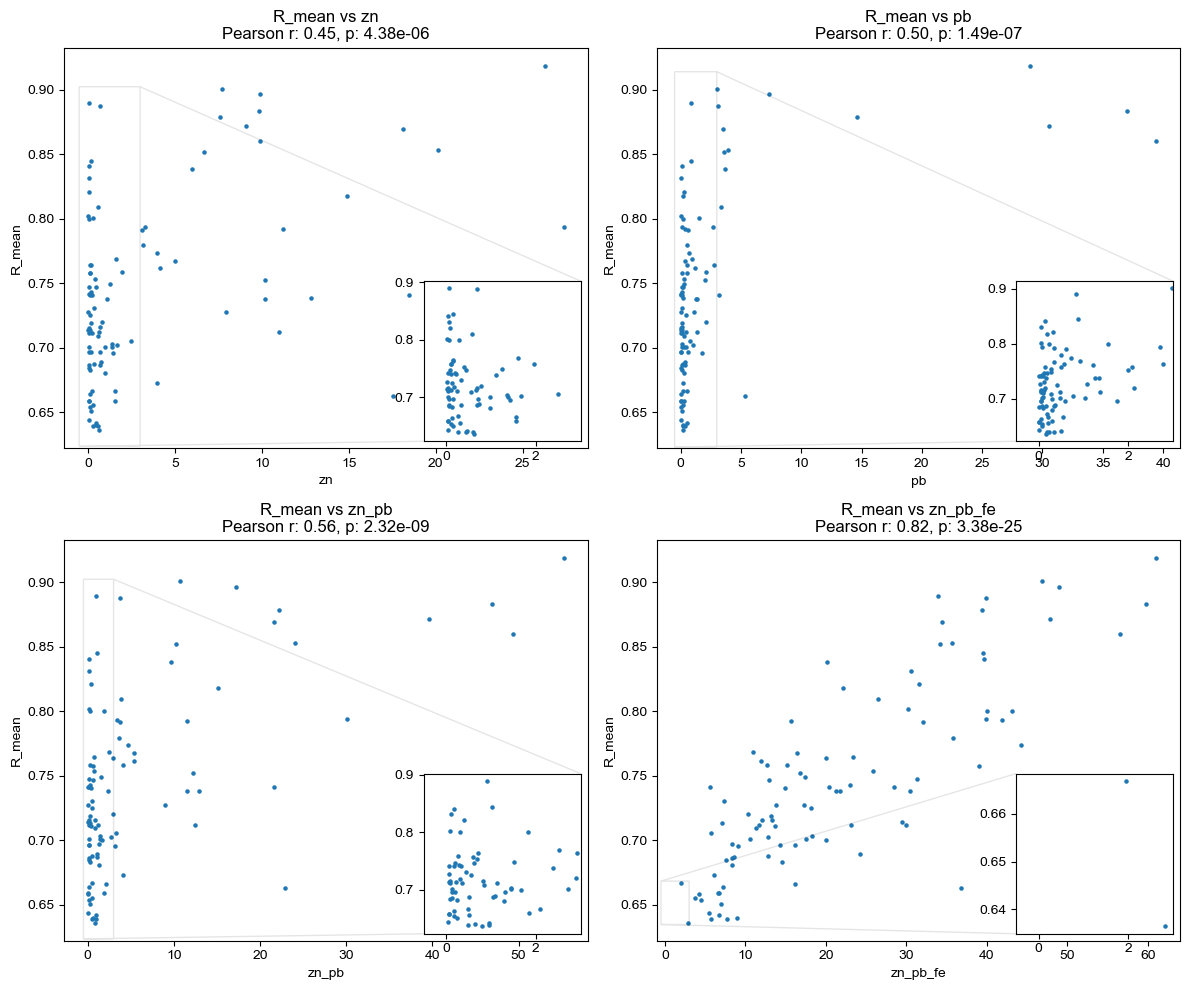

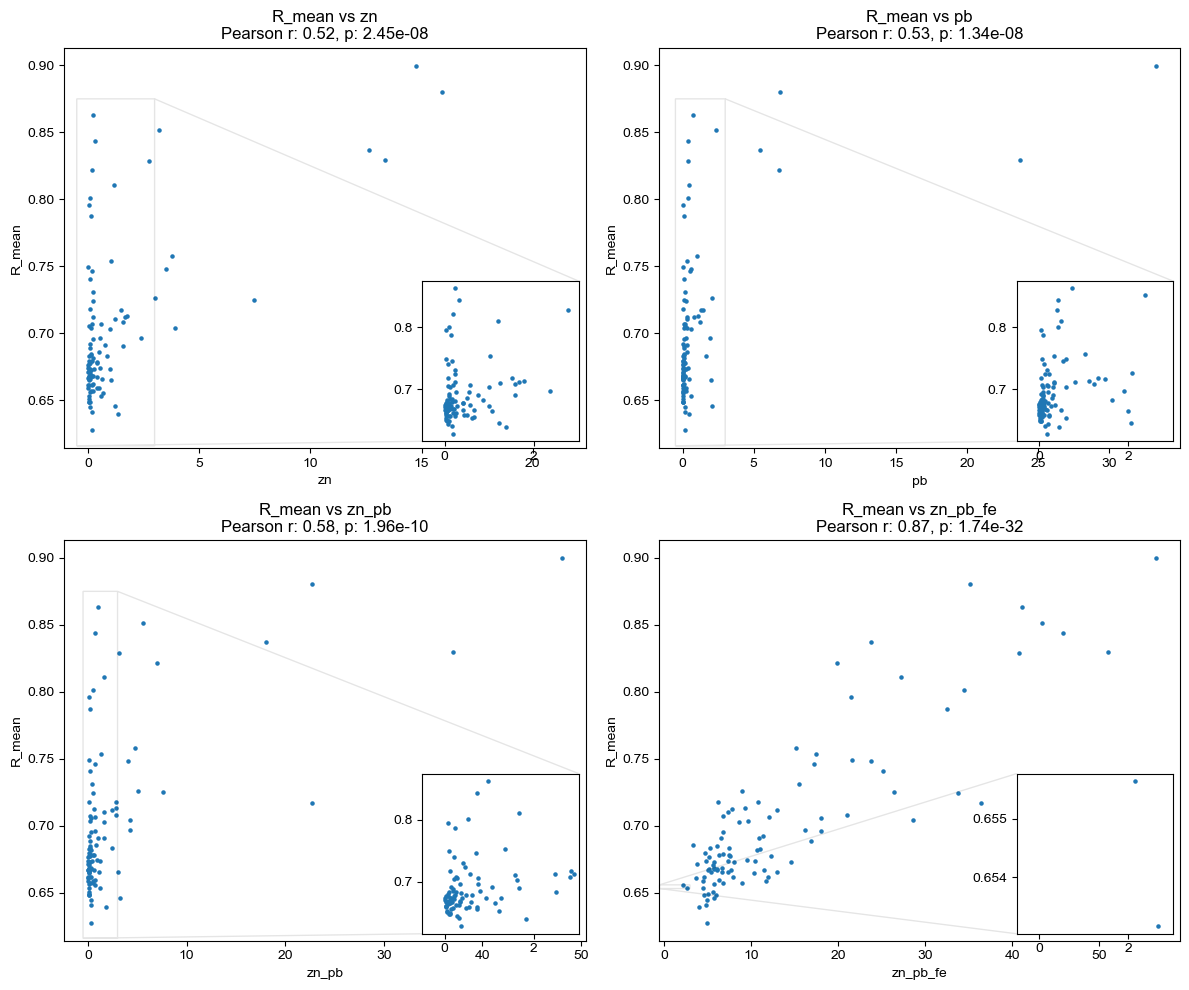

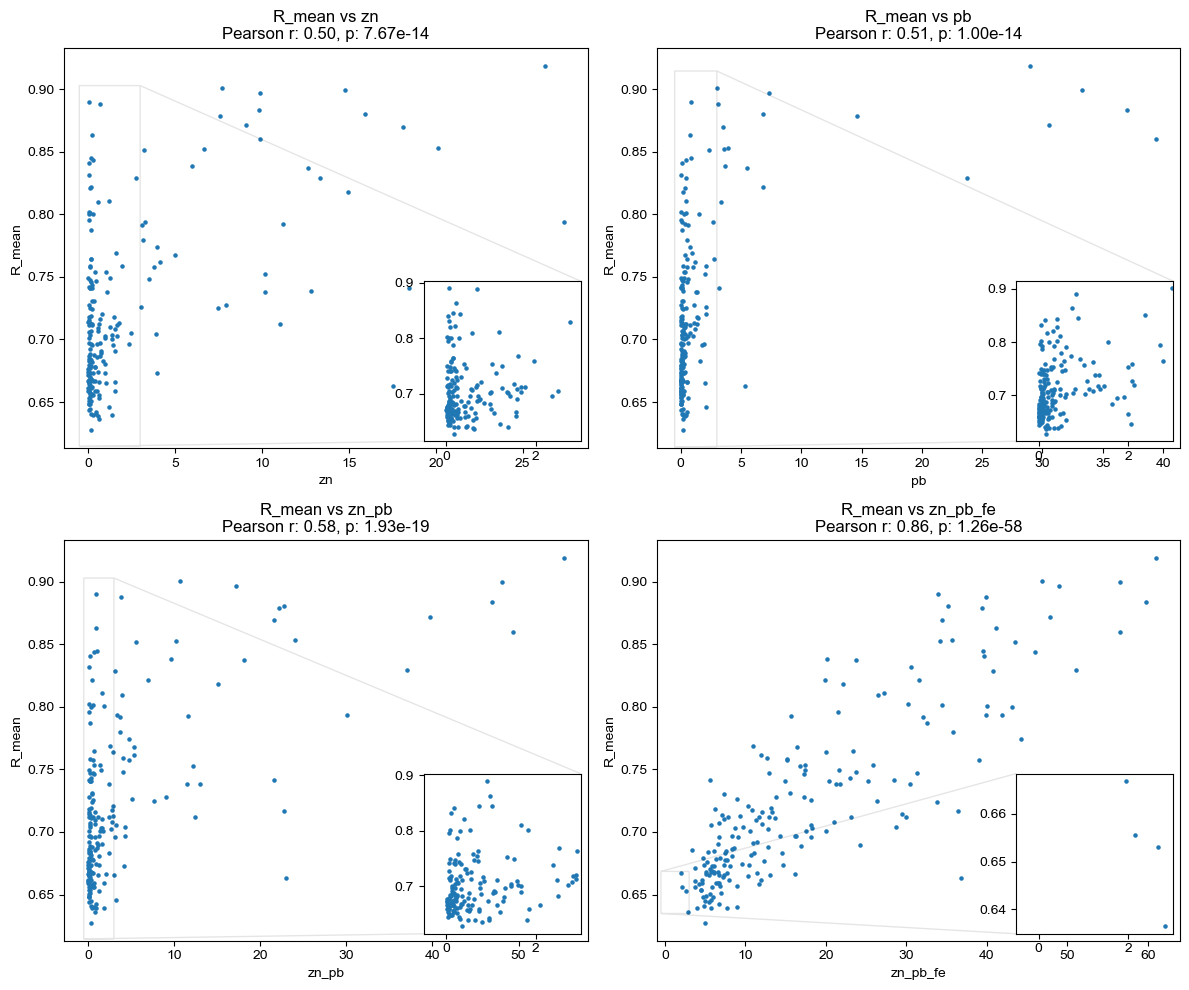

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 创建一个包含 2x2 子图的 Figure
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for data in  [input_0219, input_0224, input_both]:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    zn = data[1]['Zn_grade']
    pb = data[1]['Pb_grade']
    zn_pb =  zn + pb
    zn_pb_fe = zn + pb + data[1]['Fe_grade']
    R_0219 = RMethodClassifier(pixels=data[0], truth=data[1], I0_low=195, I0_high=196, input= 'pixels', method= 'a', const= [5, 20])
    R_mean = R_0219.R_pixels.apply(np.mean)
    data_pairs = [(zn, R_mean), (pb, R_mean), (zn_pb, R_mean), (zn_pb_fe, R_mean)]
    labels = ['zn', 'pb', 'zn_pb', 'zn_pb_fe']
    marker_size = 5
    for i, (ax, (x, y), label) in enumerate(zip(axes.flat, data_pairs, labels)):
        # 绘制主散点图
        ax.scatter(x, y, s=marker_size)
        corr, p = pearsonr(x, y)
        ax.set_title(f'R_mean vs {label}\nPearson r: {corr:.2f}, p: {p:.2e}')
        ax.set_xlabel(label)
        ax.set_ylabel('R_mean')

        # 创建嵌入的小图
        axins = inset_axes(ax, width="30%", height="40%", loc='lower right')

        # 筛选 x 坐标在 0 - 3 范围内的点
        mask = (x >= 0) & (x <= 3)
        x_zoom = x[mask]
        y_zoom = y[mask]

        # 绘制小图
        axins.scatter(x_zoom, y_zoom, s=marker_size)
        axins.set_xlim(-0.5, 3)

        # 标记小图与主图的对应区域
        ax.indicate_inset_zoom(axins, edgecolor="black", alpha=0.1)

    # 自动调整子图布局
    plt.tight_layout()

    # 显示图形
    plt.show()

In [ ]:
R dis vs zn dis?

In [65]:
calculate_rates(zn_pb_0219[0:99] > 3, true_0219[0:99, :])

{'抛废率': '0.630', '回收率': '0.924'}

In [30]:
calculate_rates(zn_pb_fe_0219[0:99] > 10.0, true_0219[0:99, :])

{'抛废率': '0.212', '回收率': '0.969'}

## R_double_threshold()

In [211]:
import importlib
from classifiers import base_classifier
from classifiers import dual_thresh
from classifiers import r_method

importlib.reload(base_classifier)
importlib.reload(dual_thresh)
importlib.reload(r_method)

from classifiers import base_classifier
from classifiers.dual_thresh import DualThreshClassifier
from classifiers.r_method import RMethodClassifier

import utils
importlib.reload(utils)
from utils import plot_curves

In [212]:
def main(input, plot = False):

    dual_0219 = DualThreshClassifier(pixels=input[0][0], truth=input[1], pixel_kind= 'grayness')
    R_0219 = RMethodClassifier(pixels=input[0], truth=input[1], I0_low=195, I0_high=196, input= 'pixels', method= 'a', const= [5, 20])
    
    R_0219 = R_0219.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, A_range=np.arange(0.5, 1.2, 0.01), step_B=0.05)
    dual_0219.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, A_range=np.arange(0, 256, 5), step_B=0.05)

    res_dual, log_dual = dual_0219.report_rates()
    res_R, log_R = R_0219.report_rates()

    if plot == True:

        plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
        # 绘制曲线

        rates = [[res_R['ideal'][0], res_R['ideal'][1], 'ideal', 'blue'], 
                [res_R['baseline'][0], res_R['baseline'][1], 'R_mean', 'green'],
                [res_R['dual_thresh'][0], res_R['dual_thresh'][1], 'R_dual_thresh', 'red'],
                [res_dual['dual_thresh'][0], res_dual['dual_thresh'][1], 'Dual_thresh','black']]
                #  [test_r[-2], test_r[-1], 'R_method_single_thresh', 'purple']]
        plot_curves(
            rates = rates,
            scrap_rates_ideal= res_R['ideal'][0],
            grade_thresholds_ideal=res_R['ideal'][2],
            best_sum_point=res_R['best_sum_point'],
            best_enrichment_point=res_R['best_enrichment_point'],
            best_constraint_point=res_R['best_constraint_point'])

    return (res_R, log_R), (res_dual, log_dual)


In [208]:
dual_0219 = DualThreshClassifier(pixels=input_0219[0][0], truth=input_0219[1], pixel_kind= 'grayness')
dual_0219.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, A_range=np.arange(0, 256, 5), step_B=0.05)

dual_0219.find_closest_point([0.2, 0.95])

[[19, 0.19695044472681067, 0.9711604764752507],
 [23, 0.27246680120586986, 0.9518246516230794]]

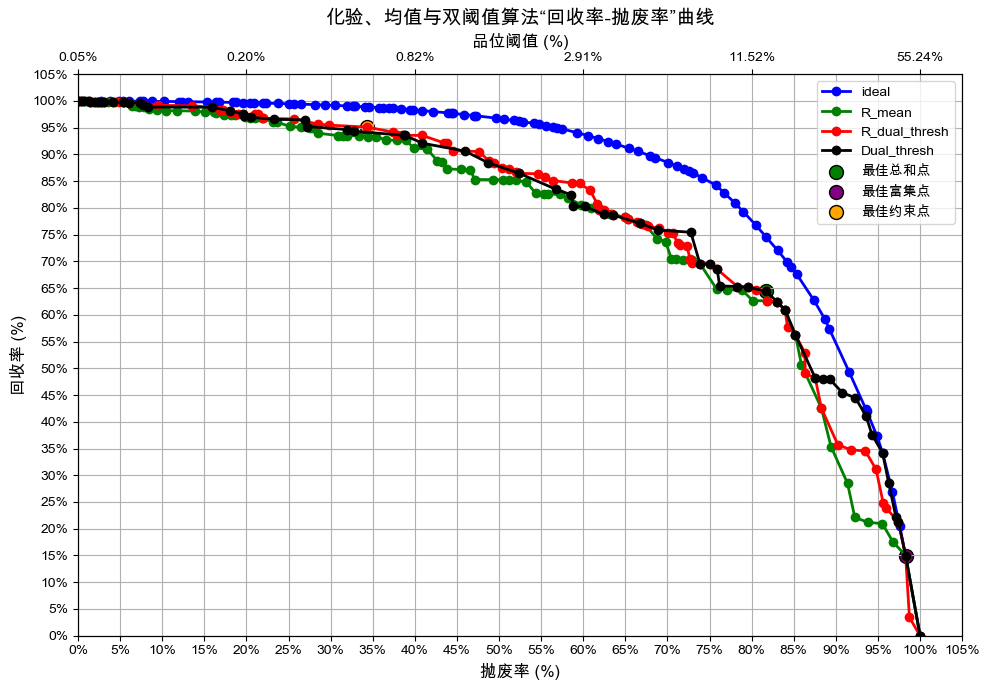

In [213]:
res_0219 = main(input_0219, plot = True)

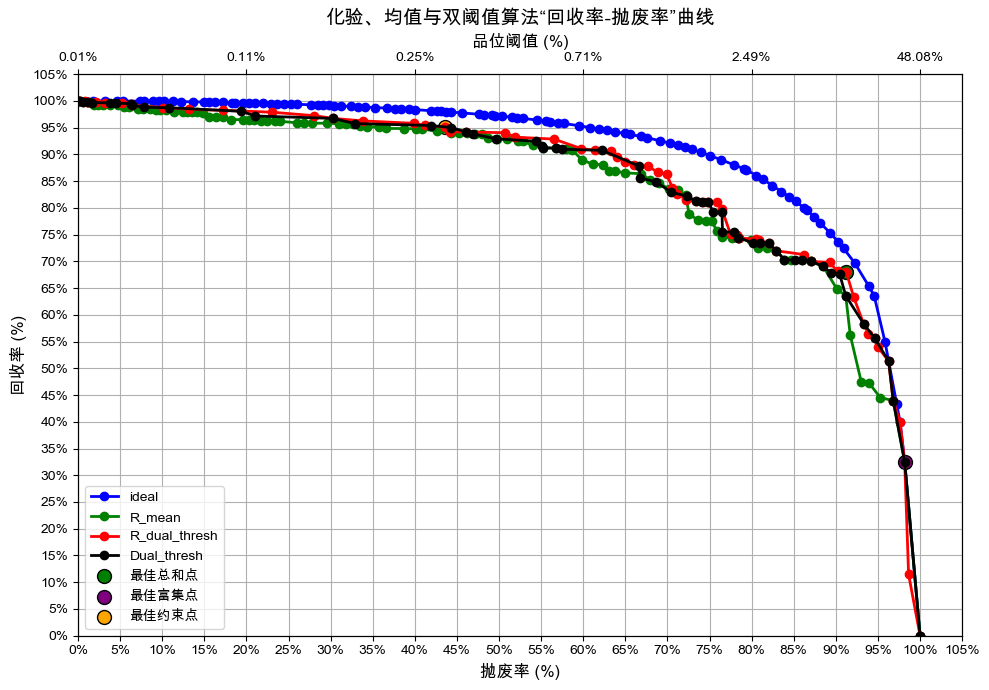

In [215]:
res_0224 = main(input_0224, plot = True)

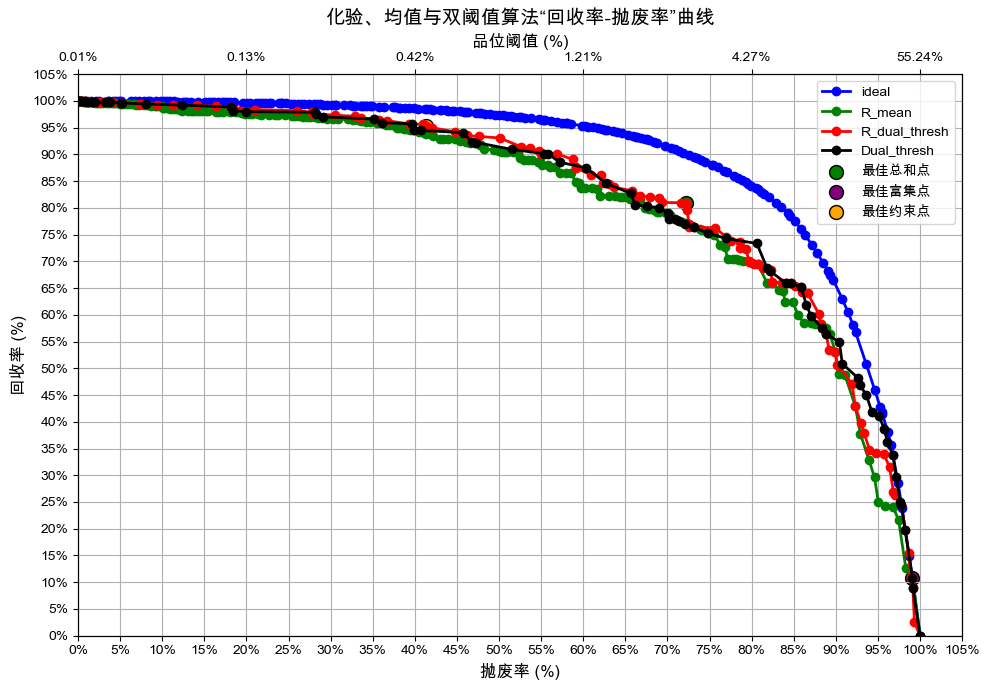

In [225]:
res_both = main(input_both, plot = True)

Text(0.5, 1.0, 'Accuracy and Grade')

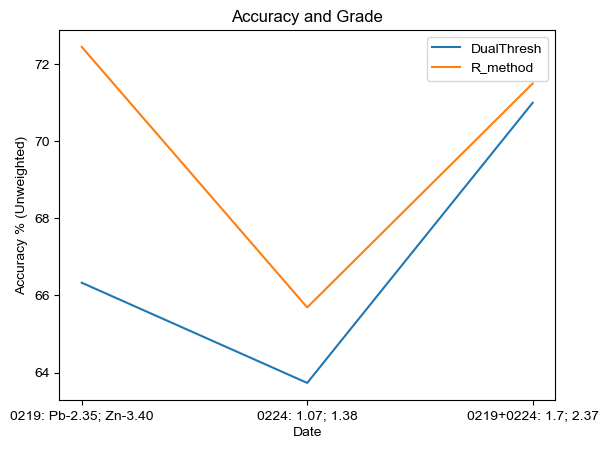

In [237]:
accuracy_dual = [66.33, 63.73, 71.00]
accuracy_R = [72.45, 65.69, 71.50]

plt.plot(accuracy_dual, label='DualThresh')
plt.plot(accuracy_R, label='R_method')
plt.xlabel('Date')
plt.ylabel('Accuracy % (Unweighted)')
plt.xticks(range(3), ['0219: Pb-2.35; Zn-3.40', '0224: 1.07; 1.38', '0219+0224: 1.7; 2.37'])
plt.legend()
plt.title('Accuracy and Grade')

In [226]:
with open('res_both_R.txt', 'w') as f:
    f.write(res_both[0][1])

with open('res_both_dual.txt', 'w') as f:
    f.write(res_both[1][1])

with open('res_0219_R.txt', 'w') as f:
    f.write(res_0219[0][1])

with open('res_0219_dual.txt', 'w') as f:
    f.write(res_0219[1][1])

with open('res_0224_R.txt', 'w') as f:
    f.write(res_0224[0][1])

with open('res_0224_dual.txt', 'w') as f:
    f.write(res_0224[1][1])

### 普通R值+阈值法

In [81]:
R_0219_mean.max()

0.9185747226139747

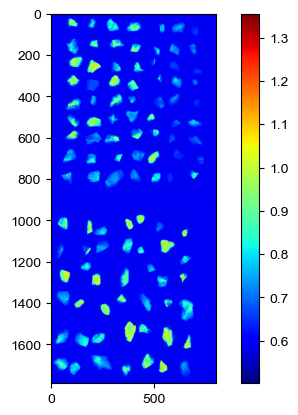

[[5, 0.198, 0.97], [6, 0.265, 0.951]]
0.7000000000000001 0.7100000000000001


{'抛废率': '0.265',
 '回收率': '0.951',
 '铅富集比': '1.449',
 '锌富集比': '1.406',
 '铅平均品位（保留）': '3.407',
 '锌平均品位（保留）': '4.782',
 '铅平均品位（抛废）': '0.352',
 '锌平均品位（抛废）': '0.830',
 '铅平均品位': '2.352',
 '锌平均品位': '3.401'}

In [82]:

consts = [5, 20]
results_0219 = R_from_path(*pre_0219[0:3], I0_low, I0_high, input = 'pixels', method = 'a', const=consts)
plt.imshow(results_0219[1], cmap = 'jet')   
plt.colorbar()
plt.show()
R_0219_mean = np.array([results_0219[0][i].mean() for i in range(len(results_0219[0]))])
minr = R_0219_mean.min(); maxr = R_0219_mean.max()
# rrange = np.arange(minr, maxr, 0.001)
rrange = np.arange(0.65, 0.9, 0.01)
test_r = get_and_plot_rates(R_0219_mean[:99], rrange, true_0219[0:99, :], 
                   zn_pb_0219[0:99] > 3, title = 'Zn + Pb > 3', accuracy_weight=weight[0:99], plot=False)

closest_points = find_closest_point(test_r[2], test_r[3], target = [0.20, 0.95])
print(closest_points)
print(rrange[closest_points[0][0]], rrange[closest_points[1][0]]) # 找出满足对应抛费率和回收率的R值
calculate_rates(R_0219_mean[0:99] > rrange[closest_points[1][0]], true_0219[0:99, :])


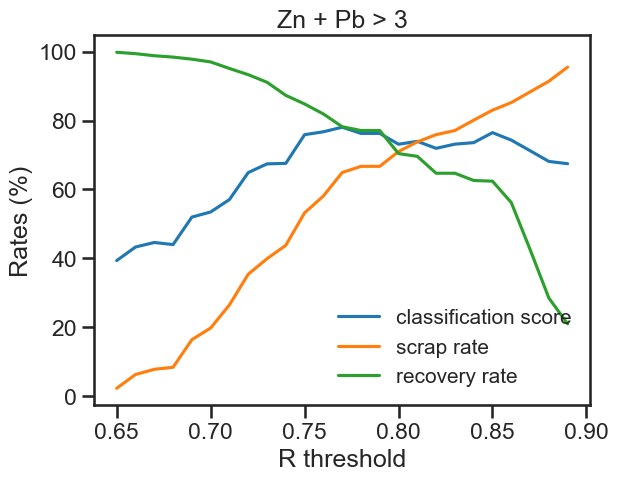

[[19.8, 97.0], [26.5, 95.1]]


In [ ]:
test_r = get_and_plot_rates(R_0219_mean[:99], [0.65, 0.9, 0.01], true_0219[0:99, :], 
                   zn_pb_0219[0:99] > 3, title = 'Zn + Pb > 3', accuracy_weight=weight[0:99], plot=False)
print(find_closest_point(test_r[2], test_r[3]))

In [148]:
final_0219_by_weight = get_and_plot_rates(R_0219_mean[:99], [0.65, 0.9], true_0219[0:99, :], 
                   zn_pb_0219[0:99] > 3, title = 'Zn + Pb > 3', accurace_weight=weight[0:99])

final_0219_no_weight = get_and_plot_rates(R_0219_mean[:99], [0.65, 0.9], true_0219[0:99, :], 
                   zn_pb_0219[0:99] > 3, title = 'Zn + Pb > 3', accurace_weight=None)

final_0219_by_zn_pb_grade = get_and_plot_rates(R_0219_mean[:99], [0.65, 0.9], true_0219[0:99, :], 
                   zn_pb_0219[0:99] > 3, title = 'Zn + Pb > 3', accurace_weight=zn_pb_0219[0:99])

final_0219_by_zn_pb_fe_grade = get_and_plot_rates(R_0219_mean[:99], [0.65, 0.9], true_0219[0:99, :], 
                   zn_pb_fe_0219[0:99]> 10, title = 'Zn + Pb + Fe> 10', accurace_weight=zn_pb_fe_0219[0:99], plot=False)

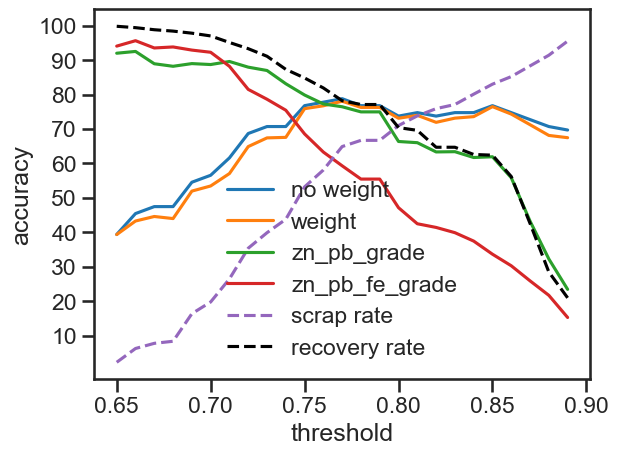

In [87]:
plt.plot(final_0219_no_weight[0], final_0219_no_weight[1], label = 'no weight')
plt.plot(final_0219_by_weight[0], final_0219_by_weight[1], label = 'weight')
plt.plot(final_0219_by_zn_pb_grade[0], final_0219_by_zn_pb_grade[1], label = 'zn_pb_grade')
plt.plot(final_0219_by_zn_pb_fe_grade[0], final_0219_by_zn_pb_fe_grade[1], label = 'zn_pb_fe_grade')

plt.plot(final_0219_no_weight[0],final_0219_no_weight[2], '--', label = 'scrap rate')
plt.plot(final_0219_no_weight[0],final_0219_no_weight[3], 'k--', label = 'recovery rate')

plt.yticks(np.arange(10, 101, 10))
plt.ylabel('accuracy')
plt.xlabel('threshold')
plt.legend(frameon = False)
plt.show()

In [24]:
results_dual_thresh = np.load('results_dual_thresh.npy')

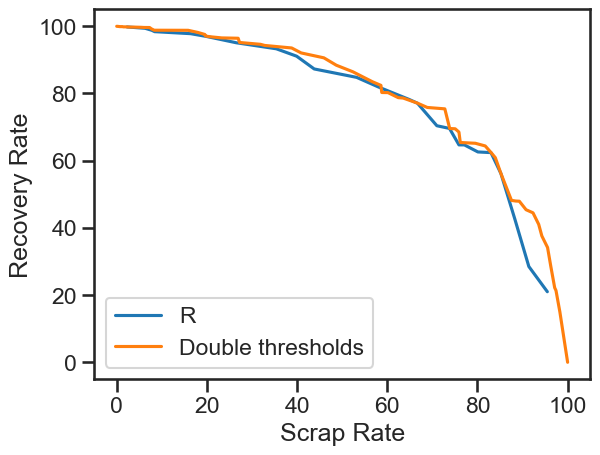

In [32]:

plt.plot(final_0219[2], final_0219[3], label = 'R')
plt.plot(results_dual_thresh[0]*100, results_dual_thresh[1]*100, label = 'Double thresholds')
plt.xlabel('Scrap Rate')
plt.ylabel('Recovery Rate')
plt.legend()
plt.show()

#### test on 0217 data

In [869]:
#R_0219_pixels, R_0219_image, low_0219, high_0219, low_contoured_19, rock_pixels_19, contour
results_0217 = R_from_path(path_0217, [None, None, None, None], I0_low, I0_high, 
                            input = 'pixels', method = 'a', max_len = 7, length=35,
                            direction = 'lrub', s_i = 0, save_rock_image=False)

In [874]:
R_0217_mean = np.array([results_0217[0][i].mean() for i in range(42)])
true_0217 = [1]*21 + [0]*21

In [929]:
for r in np.arange(0.7, 0.85, 0.01):
    print('%.2f'%r, '%.2f'%accuracy_score(true_0217, R_0217_mean > r, normalize=True))

0.70 0.86
0.71 0.88
0.72 0.93
0.73 0.95
0.74 0.95
0.75 1.00
0.76 1.00
0.77 0.95
0.78 0.90
0.79 0.90
0.80 0.88
0.81 0.88
0.82 0.88
0.83 0.83
0.84 0.81
0.85 0.79


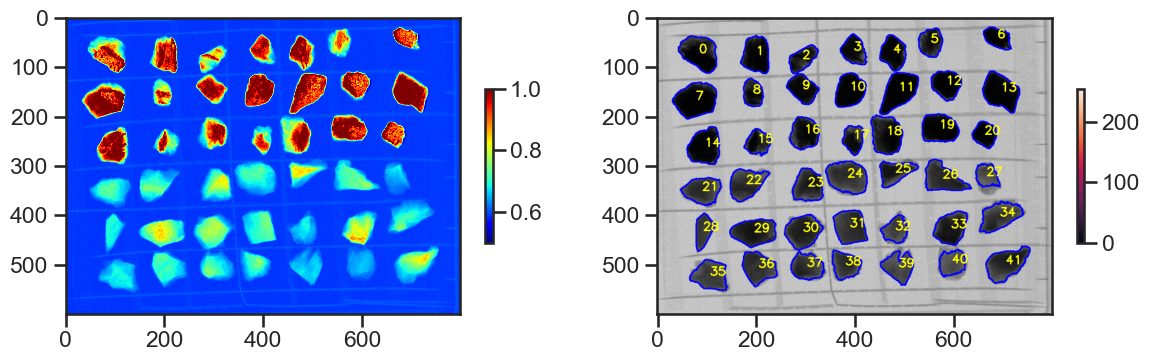

In [927]:
fig, axes = plt.subplots(1,2, figsize=(14,4))
im = axes[0].imshow(results_0217[1][50:650, 400:1200], vmin = 0.5, vmax = 1, cmap = 'jet')
fig.colorbar(im, ax=axes[0], shrink=0.5)
im6 = axes[1].imshow(results_0217[-3][50:650, 400:1200])
fig.colorbar(im6, ax = axes[1], shrink=0.5)

plt.show()

### fitting method

- I_high - I_low
- R - I_low

In [931]:
#R_0219_pixels, R_0219_image, low_0219, high_0219, low_contoured_19, rock_pixels_19, contours
len(results_0217[-2][1])

42

In [1023]:
I_low_g = [rock.mean() for rock in results_0217[-2][0][0:21]]
I_high_g = [rock.mean() for rock in results_0217[-2][1][0:21]]
R_g = R_0217_mean[0:21]
R_b = R_0217_mean[21:]
I_low_b = [rock.mean() for rock in results_0217[-2][0][21:]]
I_high_b = [rock.mean() for rock in results_0217[-2][1][21:]]

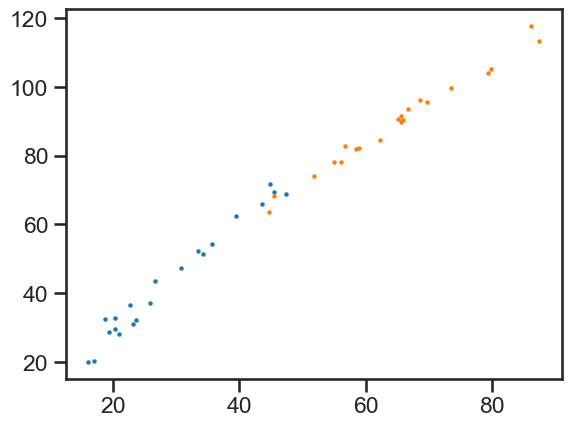

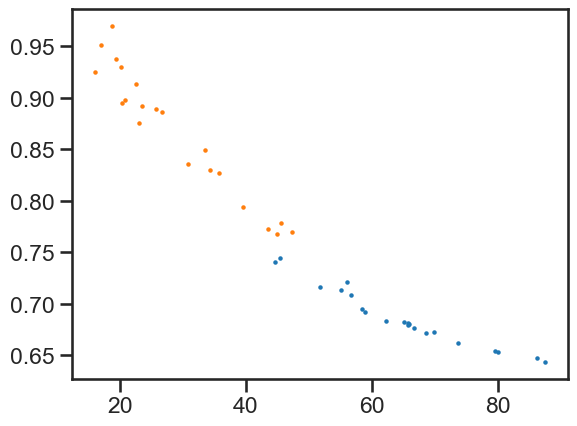

In [1024]:
plt.scatter(I_low_g, I_high_g, s=3)
plt.scatter(I_low_b, I_high_b, s=3)
plt.show()
plt.scatter(I_low_b, R_b, s=3)
plt.scatter(I_low_g, R_g, s=3)
plt.show()

In [1070]:
def plot_dis(low_mask, high_mask):
    I_low_g = [rock.mean() for rock, m in zip(results_0219[-1][0], high_mask) if m]
    I_high_g = [rock.mean() for rock, m in zip(results_0219[-1][1], high_mask) if m]

    R_g = R_0219_mean[0:99][high_mask]
    R_b = R_0219_mean[0:99][low_mask]
    I_low_b = [rock.mean() for rock, m in zip(results_0219[-1][0], low_mask) if m]
    I_high_b = [rock.mean() for rock, m in zip(results_0219[-1][1], low_mask) if m]

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].scatter(I_low_g, I_high_g, s=3, label='ore')
    axes[0].scatter(I_low_b, I_high_b, s=3, label='waste')
    axes[0].set_xlabel('I_low')
    axes[0].set_ylabel('I_high')

    x1 = np.linspace(axes[0].get_xlim()[0], axes[0].get_xlim()[1], 100)
    axes[0].plot(x1, x1, color='red', linestyle='--', label='y = x', alpha = 0.6)

    axes[0].legend(frameon=False)

    axes[1].scatter(I_low_g, R_g, s=3, label='ore')
    axes[1].scatter(I_low_b, R_b, s=3, label='waste')
    axes[1].set_xlabel('I_low')
    axes[1].set_ylabel('R')
    axes[1].legend(frameon=False)

    plt.show()

    return {'I_low_g':I_low_g, 
            'I_high_g':I_high_g, 
            'R_g':R_g, 
            'I_low_b':I_low_b, 
            'I_high_b':I_high_b, 
            'R_b':R_b}

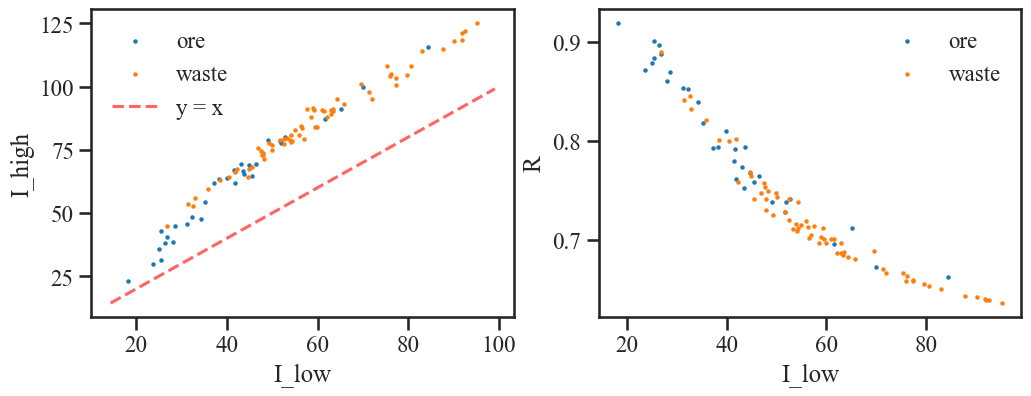

In [1061]:
high_mask = zn_pb_0219[0:99] > 3
plot_dis(~high_mask, high_mask)

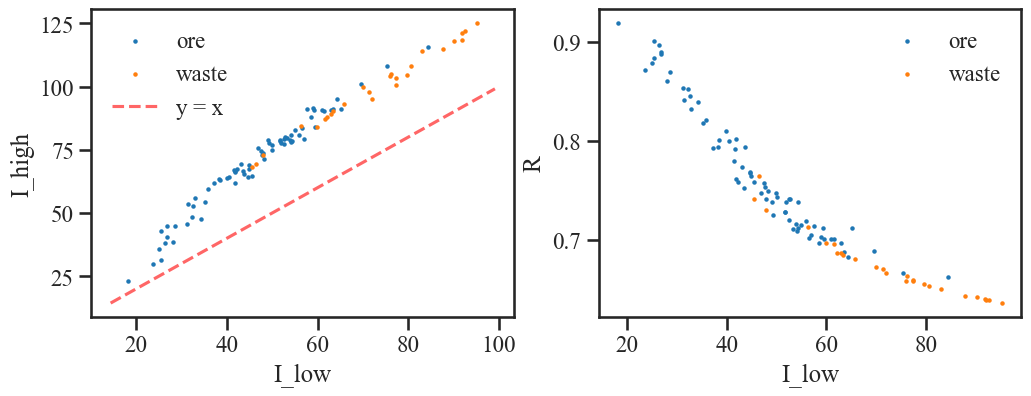

In [1071]:
high_mask = zn_pb_fe_0219[0:99] > 10
dis_fe = plot_dis(~high_mask, high_mask)

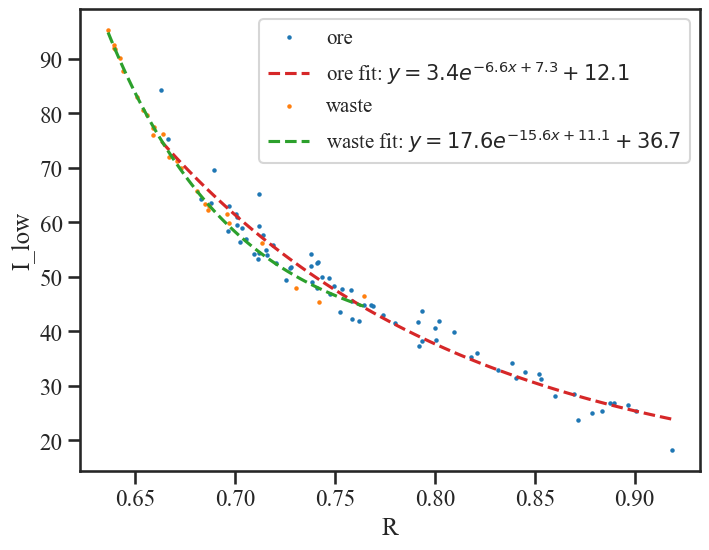

In [1150]:
def exponential_func(x, a, b, c, d):
    return a * np.exp(b * x + c) + d

I_low_g = dis_fe['I_low_g'] 
R_g = dis_fe['R_g']

I_low_b = dis_fe['I_low_b'] 
R_b = dis_fe['R_b']

# 对 ore 数据进行指数拟合
if len(I_low_g) > 0 and len(R_g) > 0:
    popt_ore, pcov  = curve_fit(exponential_func, R_g, I_low_g)
    x_ore = np.linspace(min(R_g), max(R_g), 100)
    y_ore = exponential_func(x_ore, *popt_ore)

# 对 waste 数据进行指数拟合
if len(I_low_b) > 0 and len(R_b) > 0:
    popt_waste, _ = curve_fit(exponential_func, R_b, I_low_b)
    x_waste = np.linspace(min(R_b), max(R_b), 100)
    y_waste = exponential_func(x_waste, *popt_waste)

plt.figure(figsize=(8, 6))
plt.scatter(R_g, I_low_g, s=3, label='ore')

formula_ore = f'$y = {popt_ore[0]:.1f}e^{{{popt_ore[1]:.1f}x + {popt_ore[2]:.1f}}} + {popt_ore[3]:.1f}$'

plt.plot(x_ore, y_ore, '--', color = cycle[3], label=f'ore fit: {formula_ore}')
plt.scatter(R_b, I_low_b, s=3, label='waste')
formula_waste = f'$y = {popt_waste[0]:.1f}e^{{{popt_waste[1]:.1f}x + {popt_waste[2]:.1f}}} + {popt_waste[3]:.1f}$'
plt.plot(x_waste, y_waste, '--', color = cycle[2], label=f'waste fit: {formula_waste}')
plt.legend(fontsize = 15)

plt.ylabel('I_low')
plt.xlabel('R')
plt.show()